In [1]:
%%capture
# Install the autograder to check your answers as you go along
import sys
!{sys.executable} -m pip install otter-grader --upgrade
# Initialize Otter
import otter
grader = otter.Notebook("HW4.ipynb")
import warnings
warnings.filterwarnings("ignore")

# Homework #4   
**Due Friday Dec. 1st @ 11:59 pm**

**Objective:** This assignment synthesizes many data analysis and plotting skills you have learned this quarter including reading text files, Numpy, Pandas, SciPy, and plotting.


## **Instructions:**
Read through the following instructions carefully!
### Accessing Class Code and Instructions

1. Create a fork of the class repository in GitHub.

2. Clone this repository into the home directory of your own JupyterHub by running this command:
```git clone your_SSH_URL```

**Our JupyterHub server has trouble remembering the file permissions for our SSH keys. If you get a file permission error with your private ssh key, run the following line of code in your Terminal:**

```chmod 400 ~/.ssh/id_ed25519``` 
<br>

This will change your file permission to the proper permissions that SSH requires.

3. There should now be a "homework_4" directory in the home directory of your JupyterHub. In terminal, change directories into "homework_4". Next, click on the the "homework_4" icon on the filepath hierarchy in the left panel of JupyterHub. If you don't see it, make sure you're in the home folder by clicking the folder icon under the search bar. 

4. Double click the "HW4.ipynb" to open it in a new tab and begin working on the assignment. Read the instructions carefully, and make sure to write your answers in the specified cells. 

5. Make sure to use the answer variable names provided in the starter code. There are autograder tests embedded in the notebook that will check your work when you run the Autograder, and you can which tests you passed/failed after you submit.

6. Edit the README file and write your name and UW NetID. Include a paragraph on some advantages and disadvantages of smoothing data by linear regression, interpolation, or rolling means (4-5 sentences. Review the week 8-9 pre-lectures for review on these methods. (5 points)

7. As you continue to answer the homework questions and make edits to your code, make sure to regularly update your GitHub repository as well via git add, commit, and push. A good rule of thumb would be to run these git steps anytime you make an addition or change that you don't want to accidentally lose. Generally, you can push once a day to maintain good version control practices. <br>

Also, make sure that your git commands are running without errors before you refresh your GitHub and check your changes. If you are not seeing the updated changes you created in your local JupyterHub directory, check where your status is by this command: <br>
``` git status```

Then, you can see if you made an error with your git add, commit, or push commands.

### Required Plot Elements for Figures
This assignments requires you to create and design figures using `matplotlib`. To practice good plotting practices, each figure will require the following to receive full points:
1) Concise, descriptive title for each figure/subplot
2) Axis labels with units (when possible)
3) Appropriate axis limits (minimum and maximum)
4) Appropriate tick resolution
5) Legend when using different datasets 
6) Appropriate font size (a good range is 12-15)

### Storing your answers
In the code cells where you will write your answers, there will be comments denoting:

"**# your code**"

and 

"**# answer variables**"

You may store any intermediary variables in the **your code** section. If you do not have any intermediary variables, you can leave the "your code" section blank and store your answer directly in the answer variables.
    
### Submitting to GradeScope

1. Add, commit, and push your changes to GitHub via the command line in JupyterHub.

2. Go to the class Gradescope dashboard and submit your personal GitHub repository link to the Homework 3 assignment. If prompted, log in to GitHub.

3. Run the autograder to check if your code runs and if you passed the initial unit tests. You should be able to run the autograder as many times as you want before submitting. Again, double check that your final answers are stored in the provided variable names given in the starter code!

4. Once the autograder has finished running, check that you have submitted the assignment. If you make any more changes to your code after submitting to Gradescope, make sure to push your changes to GitHub and resubmit the assignment on Gradescope. You can submit as many times as you want as there is no maximum submission attempts, but be sure to have your final submission in before the deadline.


### Honor Code

- Complete the assignment by writing and executing text and code cells as specified. For this assignment, do not use any features of Python that have not yet been discussed in the lessons or class sessions.

- Please keep in mind our late work and dropped homework grading policy. Review the syllabus for details.

- You can acknowledge and describe any assistance you've received on this assignment in the specified cell of this HW3 notebook, whether that was from an instructor, classmate (either directly or on Ed Discussion), and/or online resources other than official Python documentation websites like docs.python.org or numpy.org. Alternatively, if you prefer, you may acknowledge assistance at the relevant point(s) in your code using a Python comment (#). 

- Don't forget that you can receive 5 points of extra credit from answering at least one question on [Ed Discussion](https://edstem.org/us/courses/67282)!

# Grade Breakdown
- Question 1: 85 points
    - Part 1: 20 points
    - Part 2: 10 points
    - Part 3: 15 points
    - Part 4: 20 points
    - Part 5: 20 points
- Best coding practices: 10 points
- README: 5 points

**Total: 100 points**

- Extra Credit: 5 points for answering a question on Ed Discussion

# Q1: Pakistan Sea Level Trends (85 points)


Threats from climate change often impact devloping countries most harshly. This is particularly true for nations at risk from sea level rise. Much of Pakistan is very low elevation, and the coastal city of Karachi is on average only 8 meters above sea level. Through a combination of sea level rise and river delta subsidence, some researchers estimate that Karachi could be underwater in the next several decades
<br>[Source](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7517073/).

In this exercise, we will analyze sea level data curated by the [Permanent Service for Mean Sea Level](https://psmsl.org/data/obtaining/stations/204.php). Data was collected intermittently from Karachi during 1910-2016 (graph from PSMSL below). We will explore how to best visualize this data and interpolate missing values. Finally, we will calculate the rate of sea level rise at Karachi.

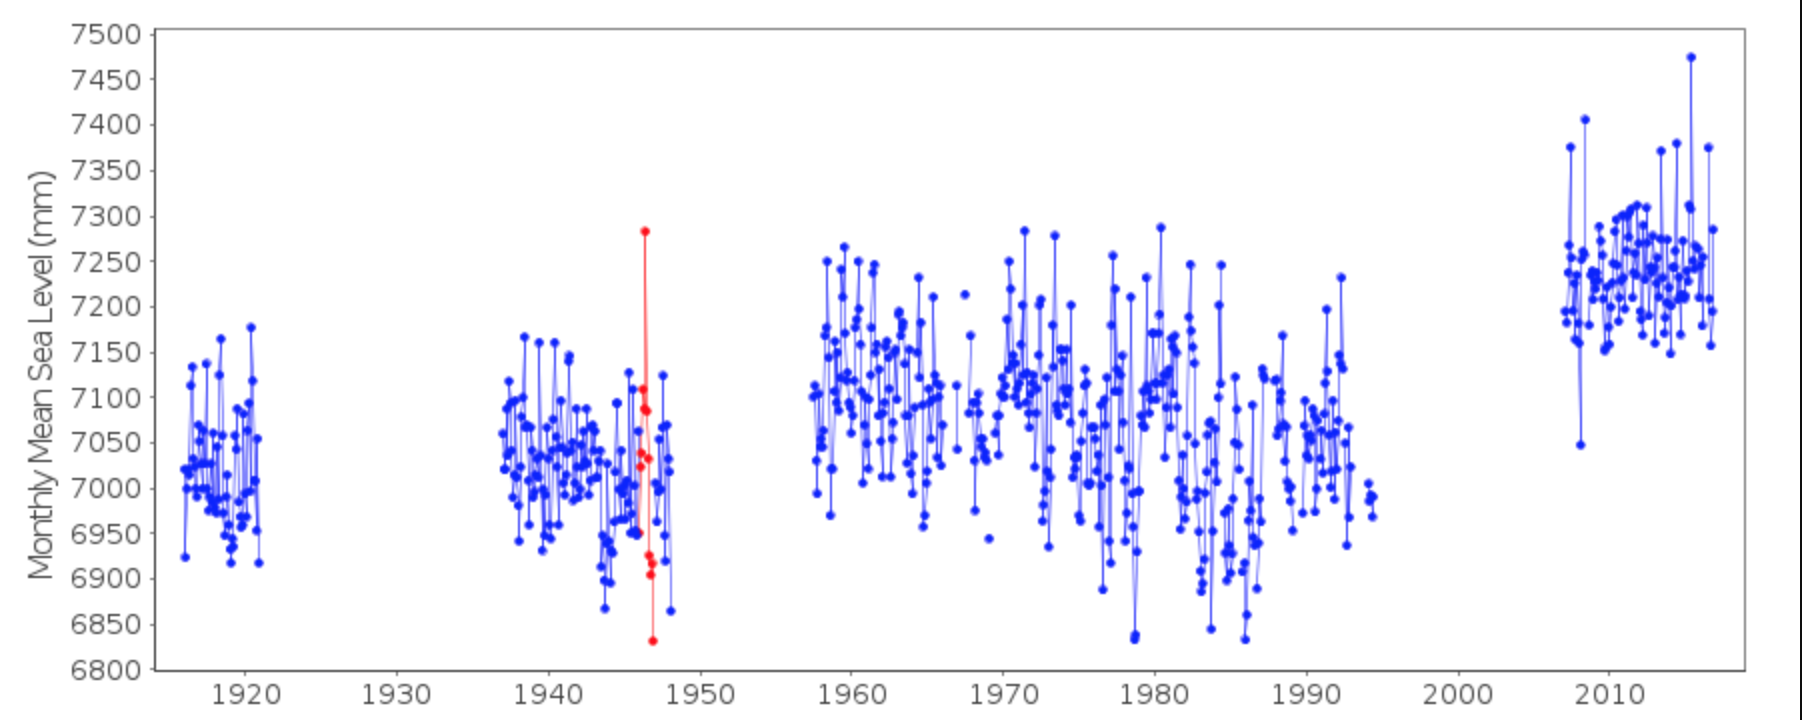

## Part 1: Loading data and cleaning (20 points)
1) Store the name of your file in `filepath` and open it with the `fileobj` variable. Use the `readline()` function and a for loop, find out how many lines of header are in the "Pakistan_sea_level_psmsl.txt" file and store this number in the `header_lines` variable. Read the information in the header. In this data file, missing sea level data points are filled with a placeholder "masking" value. (5 points)
>1) What is the mask value for missing data in this dataset? Answer this question in the markdown cell below the solution cell.

2) Use numpy `genfromtext()` to read each column of your text file into a Numpy array as floats and store the array in the `sea_level` variable.(_HINT: Remember that indexing starts with 0 in Python!_). Store the columns as individual 1-D arrays (excluding "number of missing days") in the provided answer variables, `year_month`, `depth_mm`, `data_flag`. (5 points)
>1) What is the delimiter type for this text file? Answer this question in the markdown cell below the solution cell.

3) Using the numpy `where()` function and its first positional argument ([Documentation](https://numpy.org/doc/stable/reference/generated/numpy.where.html)), find the indices of the masked depth values that represent missing values in your Numpy array and store the resulting array in `mask_inds`. Using `mask_inds`, replace the masking values in `depth_mm` with `np.nan` values. (5 points)

4) PSMSL also flags data that is likely erroneous. In this data, a data quality flag value of 11 represents bad data. We will also replace these suspicious values with `np.nan` values to ignore them. (5 points)

  >a) Find the indices of bad data quality values in `data_flag` by numpy `where()` and store in `bad_inds`.

  >b) Save the corresponding "year" and "depth_mm" values of bad data in a separate arrays, `bad_years` and `bad_depths` respectively. 
  
  >c) Replace bad depth values in `depth_mm` with `np.nan` values.

In [2]:
# import the necessary packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import interpolate 
from scipy import stats
print("Part 1")
# your code

# filepath = "Pakistan_sea_level_psmsl.txt"
# fileobj = open(filepath) # open file

# for x in range(30):
#     print(x, fileobj.readline()) #read one line at a time
# can find that headerlines stop at [21], which means there are 22 headerlines

# thought of using the below method but couldn't figure out how to code it so i just used the above method instead
#lines = fileobj.readlines() #lines in the file 
#print(lines) #to check how to differentiate between headerlines and data + "hardcode" method to make sure the loop is running correctly

# for i in lines:
#     if #line isn't numerical, then header line+=1 
#     elif #line is numerical, break loop 

# answer variables 
filepath = "Pakistan_sea_level_psmsl.txt"
fileobj = open(filepath) 
header_lines = 22

print("Part 2")
# your code
#display(fileobj.readlines()) #used to check what the delimiter is & which columns correspond to the year/ depth/ data flag
#data_flag should be [3] since [2] is the number of missing days, but we are skipping that column of data

# answer variables
sea_level = np.genfromtxt(filepath, delimiter = ";", skip_header = header_lines)
# print(sea_level) #checking if there are values and if it looks correct
year_month = sea_level[:,0]
#print(year_month) # check if it returned the year values
depth_mm = sea_level[:,1]
#print(depth_mm)
data_flag = sea_level[:,3]
#print(data_flag)

#display
display(sea_level)
display(year_month)
display(depth_mm)
display(data_flag)

print("Part 3")
# your code
missing_val = np.where(depth_mm == -99999)[0] #[0] to return rows of missing values as indices
#print(missing_val) # to check if there are values stored in this variable or if it returned empty

# answer variables
mask_inds = missing_val #i just replaced the variable name instead of copy and pasting the code from above
depth_mm[mask_inds] = np.nan #replace -99999 values in previously found indices with NaN values

print("Part 4")
# your code

# answer variables
bad_inds = np.where(data_flag == 11)[0] #same as part 3, except the masking value =11 instead of -99999
#print(bad_inds) #checking if the indices are correct (indice count start from after header lines are skipped) 
#replace bad flag data values (11) with NaN values
data_flag[bad_inds] = np.nan

badyears = year_month[bad_inds] # finding the correspondiong year_month values using the bad data indices
baddepths = depth_mm[bad_inds] #same as above just replace the year_month column with depth_mm

#replacing bad depth values n depth_mm with np.nan values
depth_mm[bad_inds] = np.nan

Part 1
Part 2


array([[1.9160417e+03, 7.0210000e+03, 0.0000000e+00, 0.0000000e+00],
       [1.9161250e+03, 6.9240000e+03, 0.0000000e+00, 0.0000000e+00],
       [1.9162083e+03, 7.0000000e+03, 0.0000000e+00, 0.0000000e+00],
       ...,
       [2.0167083e+03, 7.1570000e+03, 4.0000000e+00, 0.0000000e+00],
       [2.0167917e+03, 7.1950000e+03, 4.0000000e+00, 0.0000000e+00],
       [2.0168750e+03, 7.2850000e+03, 0.0000000e+00, 0.0000000e+00]])

array([1916.0417, 1916.125 , 1916.2083, ..., 2016.7083, 2016.7917,
       2016.875 ])

array([7021., 6924., 7000., ..., 7157., 7195., 7285.])

array([0., 0., 0., ..., 0., 0., 0.])

Part 3
Part 4


1. What is the mask value for missing data in this dataset? 
The missing data are represented as "-99999" values.

2. What is the delimiter type for this text file?
The delimiter is ";", as it separates the data values. 

<!-- BEGIN QUESTION -->

## Part 2: Plotting (10 points)
Make a matplotlib figure with using `plt.subplots()`. 

*Make sure you include all required elements including proper labels, colors, and legends.* 
  
>a) Plot your depth timeseries (x = "year_month", y = "depth_mm"). Add a marker of your choice.

>b) Plot the bad depths you removed from your original arrays on the top subplot in a different color.

>c) Add a legend with the original and bad data labeled.

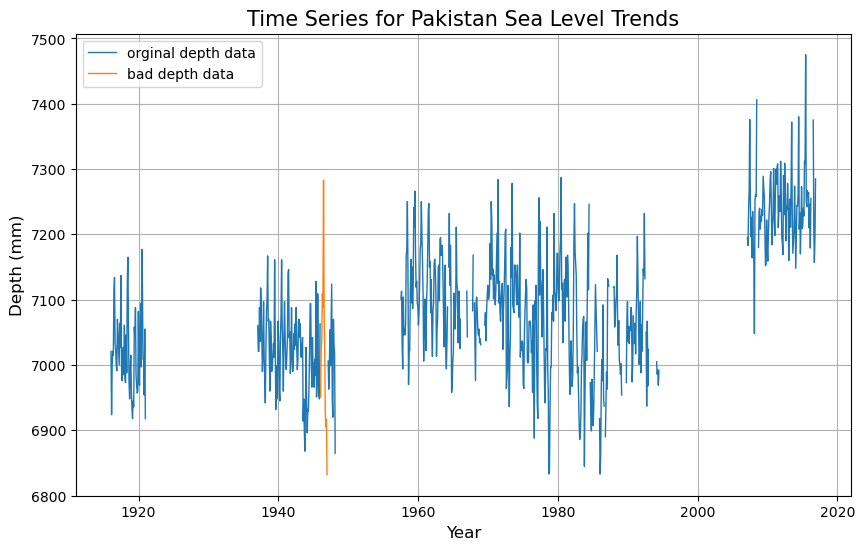

In [3]:
# create plot
fig, ax = plt.subplots(figsize=(10,6))

#plotting timeseries (original and bad depth data)
plt.plot(year_month, depth_mm, lw=1,
        label="orginal depth data")
plt.plot(badyears, baddepths, lw=1,
        label="bad depth data") 

#label axis and title
plt.title('Time Series for Pakistan Sea Level Trends', fontsize=15)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Depth (mm)', fontsize=12)

#adding a grid
plt.grid()

#create legend (label names are already inputted in the plotting function)
plt.legend()

<!-- END QUESTION -->

## Part 3: Interpolation (15 points)
1) Turn your Numpy arrays into a DataFrame with three columns. (5 points) 

>a) Store your `year_month`, `depth_mm`, and `data_flag` arrays in a list and transpose the list of arrays. Store the transposed list in the `list_data` variable.

>b) Create a pandas dataframe and store it in the variable `df`. Set the named argument, _data = list_data_, in the pandas `DataFrame()`.

>c) Set your column names to 'Year', 'Depth', and 'Flag' using the "columns" argument in the `DataFrame()` function. 

>d) Display `df`. 

2) There are large gaps in this dataset. Use the pandas `dataframe.interpolate()` to linearly interpolate the missing depth values. (5 points)

>a) Using the `loc()` function, find the indices of depth values that are `np.nan` using the df["Depth"] column. (**HINT: Use the pandas [dataframe.isnull()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isnull.html) function**). How many rows are null? Use the `len()` function, store this number in the `missing_rows` variable, and print it.

>b) Apply the `interpolate()` function to the `df` to the df["Depth"] column. Store your interpolated depth values in a new column called "Depth_interp" in `df`.

>d) Display `df`.

3) Plotting the interpolated data and compare against original data. (5 points)

>a) Make a matplotlib figure with two subplots using the 'subplots()' function (set nrows = 2). Set the figsize to (10,6). **Make sure you include all required elements including proper labels, colors, and legends.**

>b) Copy and paste your plot from Part 2) onto the **top** subplot. Include the depth time series and bad depth values, and make sure to plot on the correct axes object.

>c) Plot the "Depth_interp" values on your bottom subplot as a different color from your "Depth" data. Add a label and make a legend for the **bottom** subplot.

>d) Do you think the interpolation accurately describes trends in missing depth data? Why or why not? Answer this question in the markdown cell below the code solution cell.

Part 1: 


,Year,Depth,Flag
0,1916.0417,7021.0,0.0
1,1916.1250,6924.0,0.0
2,1916.2083,7000.0,0.0
3,1916.2917,7021.0,0.0
4,1916.3750,7015.0,0.0
...,...,...,...
1206,2016.5417,7375.0,0.0
1207,2016.6250,7209.0,0.0
1208,2016.7083,7157.0,0.0
1209,2016.7917,7195.0,0.0


Part 2: 
There are 531 missing data points.


,Year,Depth,Flag,Depth_interp
0,1916.0417,7021.0,0.0,7021.0
1,1916.1250,6924.0,0.0,6924.0
2,1916.2083,7000.0,0.0,7000.0
3,1916.2917,7021.0,0.0,7021.0
4,1916.3750,7015.0,0.0,7015.0
...,...,...,...,...
1206,2016.5417,7375.0,0.0,7375.0
1207,2016.6250,7209.0,0.0,7209.0
1208,2016.7083,7157.0,0.0,7157.0
1209,2016.7917,7195.0,0.0,7195.0


Part 3: 


Text(0.5, 0.98, 'Time Series for Pakistan Sea Level Trends')

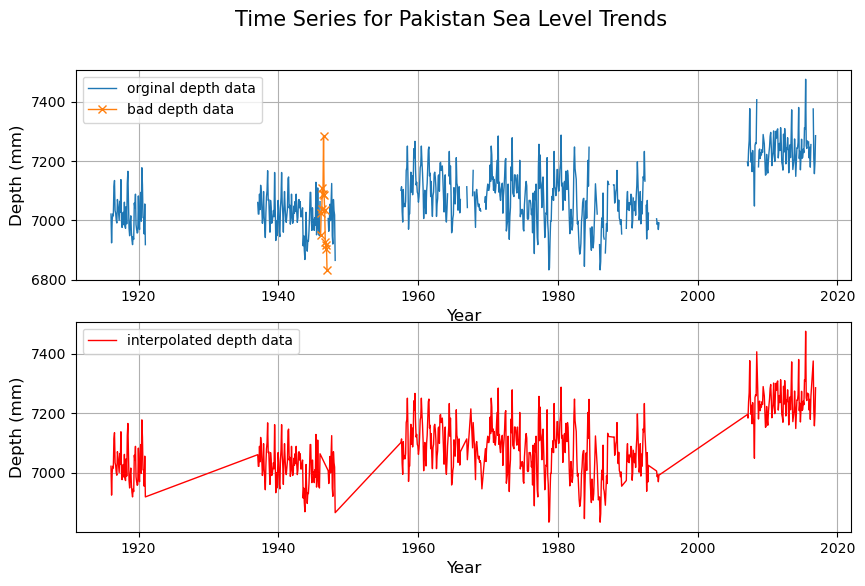

In [4]:
## Part 3
print('Part 1: ')
# your code 

# answer variables
list_data = np.array([year_month, depth_mm, data_flag]).T #.T to transpose, columns are stored as a list using []
# display(list_data) #looking at if the code is giving what i want 
df = pd.DataFrame(data = list_data, columns = ["Year", "Depth", "Flag"]) #set data = list_data & set column names as said in the instructions

# display
display(df)

print('Part 2: ')
# your code

# df["Depth"].isnull # this helps find the null values for "Depth" column in dataframe
#need to find the index, so use .loc and .index 
index = df.loc[df["Depth"].isnull()].index 

# answer variables
missing_rows = len(index) #find how many rows of nan values there are by using len()
df["Depth_interp"] = df["Depth"].interpolate()

# print and display 
print("There are", missing_rows, "missing data points.")
display(df) # check if new column "Depth_interp" is there

print('Part 3: ')
# your code to plot
fig, axs = plt.subplots(figsize=(10,6), nrows = 2)

# for top plot (copy and paste from part 2)
# had to change from plt.plot to axs.plot since i had to specify which subplot i want to plot on
# referred to this documentation: https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html
axs[0].plot(year_month, depth_mm, lw=1,
        label="orginal depth data")
axs[0].plot(badyears, baddepths, marker="x", lw=1,
         label="bad depth data")
axs[0].set_xlabel('Year', fontsize=12) #had to change plt.xlabel to axs.set_xlabel
axs[0].set_ylabel('Depth (mm)', fontsize=12)
axs[0].grid()
axs[0].legend()

# for bottom plot
# set x & y axis data as variables to plot easily
depth_interp = df["Depth_interp"]

axs[1].plot(year_month, depth_interp, c="red", lw=1,
        label="interpolated depth data")
axs[1].set_xlabel('Year', fontsize=12) #had to change plt.xlabel to axs.set_xlabel
axs[1].set_ylabel('Depth (mm)', fontsize=12)
axs[1].grid()
axs[1].legend()

# making title for both graphs 
fig.suptitle('Time Series for Pakistan Sea Level Trends', fontsize=15) #copied this from the documentation


3d) d) Do you think the interpolation accurately describes trends in missing depth data? Why or why not? Answer this question in the markdown cell below the code solution cell.

Yes, the interpolated data plot is pretty similar to the original plot. Thought some limitations may include not being able to account for the seasonal flunctuations, but overall the trend is ging upwards.  

## Part 4: Calculate Rolling Mean and Interpolate (20 points)
1) Depth data varies greatly between months, which can make it difficult to see larger scale trends. (10 points)

>a) To better visualize yearly trends, calculate the rolling yearly mean of depths for "Depth" column using Pandas `rolling()` function ([Documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html)). _HINT: The data is in monthly resolution. How many months will you need to get the rolling yearly mean?_

>b) Store the rolling mean depth values in a new column called "yearly_height" in `df`.

>c) Copy and paste your plot from Part 3.3.

>d) Plot your "yearly_height" values against "Year" on the **top** subplot, overlaying the original time series data. Make this line a different color and line style, and add it to the legend in the top subplot.


2) The `rolling()` function does not deal with nan values, which represents our missing and suspicious data. This results in creating larger data gaps in the calculated rolling mean depth values compared to the original data. Here, we will _interpolate and extrapolate_ the rolling mean values to resolve the data gaps. (10 points)

>a) Apply the `interpolate()` function to the `df` to the df["yearly_height"] column. Set the argument `limit_direction = "both"` to extrapolate the data at the ends. Store your interpolated depth values in a new column called "Depth_interp_roll" in `df`.

>b) Building off your plot from Part 1 above, plot your interpolated rolling mean depth values ('Depth_interp_roll') on your **bottom** subplot as a different color. Add it to the legend in the bottom subplot. (You do not need to copy/paste the code here, just add the line of code underneath your plotting code from Part 1).

>c) Do you think this interpolation describes the trends in missing depth data more or less accurately than your first interpolation attempt? Why or why not? Store your answer in the markdown cell below the solution cell. 

Part 1: 


,Year,Depth,Flag,Depth_interp,yearly_height
0,1916.0417,7021.0,0.0,7021.0,NaN
1,1916.1250,6924.0,0.0,6924.0,NaN
2,1916.2083,7000.0,0.0,7000.0,NaN
3,1916.2917,7021.0,0.0,7021.0,NaN
4,1916.3750,7015.0,0.0,7015.0,NaN
...,...,...,...,...,...
1206,2016.5417,7375.0,0.0,7375.0,NaN
1207,2016.6250,7209.0,0.0,7209.0,NaN
1208,2016.7083,7157.0,0.0,7157.0,NaN
1209,2016.7917,7195.0,0.0,7195.0,NaN


Part 2: 


,Year,Depth,Flag,Depth_interp,yearly_height,depth_interp_roll
0,1916.0417,7021.0,0.0,7021.0,NaN,7028.833333
1,1916.1250,6924.0,0.0,6924.0,NaN,7028.833333
2,1916.2083,7000.0,0.0,7000.0,NaN,7028.833333
3,1916.2917,7021.0,0.0,7021.0,NaN,7028.833333
4,1916.3750,7015.0,0.0,7015.0,NaN,7028.833333
...,...,...,...,...,...,...
1206,2016.5417,7375.0,0.0,7375.0,NaN,7269.250000
1207,2016.6250,7209.0,0.0,7209.0,NaN,7269.250000
1208,2016.7083,7157.0,0.0,7157.0,NaN,7269.250000
1209,2016.7917,7195.0,0.0,7195.0,NaN,7269.250000


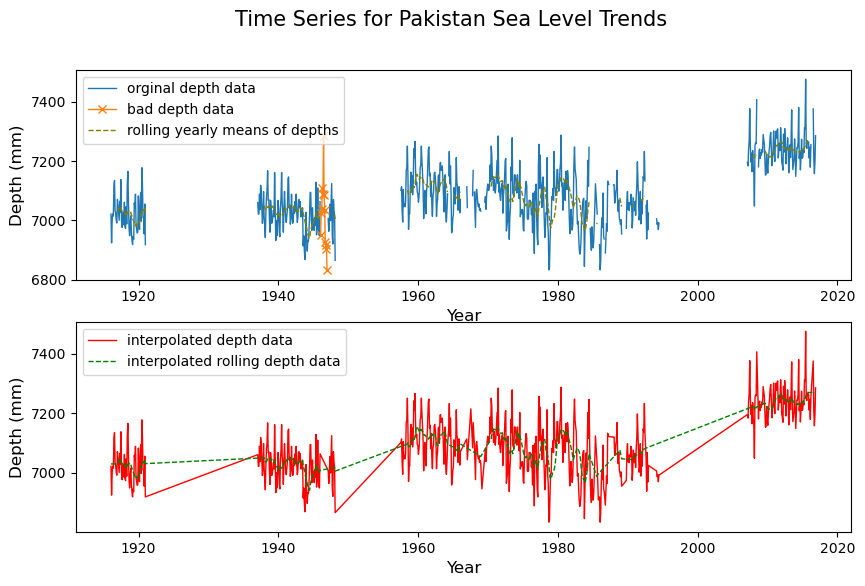

In [5]:
print('Part 1: ')
# your code
# monthly resolution = 12 months 
#.rolling(12) to find rolling depth with monthly resolution
#.mean to find rolling mean
df["yearly_height"] = df["Depth"].rolling(window=12).mean()
display(df)

#plotting the graph (copied from part 3.3)
fig, axs = plt.subplots(figsize=(10,6), nrows = 2)
axs[0].plot(year_month, depth_mm, lw=1,
        label="orginal depth data")
axs[0].plot(badyears, baddepths, marker="x", lw=1,
         label="bad depth data")
axs[0].set_xlabel('Year', fontsize=12) #had to change plt.xlabel to axs.set_xlabel
axs[0].set_ylabel('Depth (mm)', fontsize=12)
axs[0].grid()
axs[0].legend()

depth_interp = df["Depth_interp"]
axs[1].plot(year_month, depth_interp, c="red", lw=1,
        label="interpolated depth data")
axs[1].set_xlabel('Year', fontsize=12) #had to change plt.xlabel to axs.set_xlabel
axs[1].set_ylabel('Depth (mm)', fontsize=12)
axs[1].grid()
axs[1].legend()

fig.suptitle('Time Series for Pakistan Sea Level Trends', fontsize=15) #copied this from the documentation

#Plot your "yearly_height" values against "Year" on the top subplot, overlaying the original time series data
axs[0].plot(year_month, df["yearly_height"], c="olive", ls="--", lw=1,
         label="rolling yearly means of depths")
axs[0].grid()
axs[0].legend()

print('Part 2: ')
# your code 
df["depth_interp_roll"] = df["yearly_height"].interpolate(limit_direction = "both")
# same code to interpolate as part 3.1, except adding limit_direction since the instructions said to do so

# display
display(df)

# your code for plotting
# giving the interpolated rolling depth data a variable name for easier plotting, same thing as the previous plot and just copied
depth_interp_roll = df["depth_interp_roll"]
axs[1].plot(year_month, depth_interp_roll, ls="--", c="green", lw=1,
        label="interpolated rolling depth data")
axs[1].set_xlabel('Year', fontsize=12) #had to change plt.xlabel to axs.set_xlabel
axs[1].set_ylabel('Depth (mm)', fontsize=12)
axs[1].grid()
axs[1].legend()

## Part 5: Perform linear regression (20 points)
1) Model average sea level rise using a linear regression. (10 points)

>a) Calculate a linear regression using SciPy's `linregress()` function. Set x to "Year" and y to "Depth_interp"*. Do this in one line of code and store the output in the `slope`, `intercept`, `rvalue`, `pvalue`, and `stderr` variables. 

*It is necessary to use interpolated depth values because linregress does not work with `np.nan` values. 

>b) Use the `slope`, `intercept`, and your "Year" column to calculate the linear regression fit (Review group_activity8 or Week 9 pre-lecture slides if you forgot the formula). Store the linear regression fit as a new column called "full_regression" in `df`. 

>c) Copy and paste your plot from Part 4.2.

>d) Plot your "full_regression" values against "Year" on the **bottom** subplot, overlaying the previous interpolated depth and rolling mean interpolation data. Make this line a different color and line style, and include the calculated rate of sea level rise (including units) in your plot legend.

>e) Does a linear model accurately describe how depth is changing over time? Why? Type your answer in the markdown cell below the coding solution cell.

2) Investigate whether sea level rise has been accelerating over time. (10 points)

>a) Make a new DataFrame including all columns from `df`, but subset the rows from the most recent instrumentation period ("Year" > 2007). Name it `recent_df`. _HINT: Use the `loc[]` function_

>b) Design another linear regression as in part 1 using the "Depth_interp" column in `recent_df`. Store the output in the `slope_new`, `intercept_new`, `rvalue_new`, `pvalue_new`, and `stderr_new` variables. 

>c) Calculate the linear regression fit with `slope_new` and `intercept_new`, but use the "Year" column from `df`, _**not**_ `recent_df`. Store the recent regression fit as a new column called "recent_regression" in `df`.

>d) Building off your plot from Part 1, plot your recent regression values ('recent_regression') on your **bottom** subplot as a new color. Add it to the legend in the bottom subplot and include the calculated rate of sea level rise (including units) in your plot legend. (You do not need to copy/paste the code here, just add the line of code underneath your plotting code from Part 1).

>e) Compare the slopes of your two linear regressions. Do you think sea level rise is accelerating? Why or why not? Type your answer in the markdown cell below the coding solution cell.

Part 1: 
Part 2: 


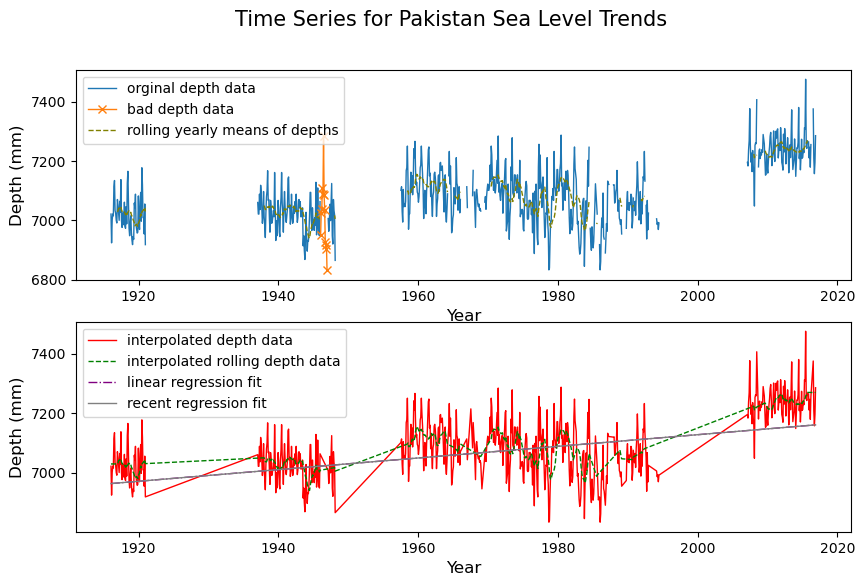

In [8]:
print("Part 1: ")
# your code to calculate the linear regression
slope, intercept, rvalue, pvalue, stderr = stats.linregress(df["Year"],df["Depth_interp"])
# im not sure why it isn't working, ive tried restarting the kernel but it still returns an error

# your code to calculate the linear regression fit
# referred to the group activity from this week (week 9) -- storing x and y values as variables
x_values = df["Year"]
y_values = slope * x_values + intercept

#store linear regression fit in df["full_regression"]
df["full_regression"] = y_values

#plot 
#copied my plot code from part 4
fig, axs = plt.subplots(figsize=(10,6), nrows = 2)
axs[0].plot(year_month, depth_mm, lw=1,
        label="orginal depth data")
axs[0].plot(badyears, baddepths, marker="x", lw=1,
         label="bad depth data")
axs[0].set_xlabel('Year', fontsize=12) #had to change plt.xlabel to axs.set_xlabel
axs[0].set_ylabel('Depth (mm)', fontsize=12)
axs[0].grid()
axs[0].legend()

depth_interp = df["Depth_interp"]
axs[1].plot(year_month, depth_interp, c="red", lw=1,
        label="interpolated depth data")
axs[1].set_xlabel('Year', fontsize=12) #had to change plt.xlabel to axs.set_xlabel
axs[1].set_ylabel('Depth (mm)', fontsize=12)
axs[1].grid()
axs[1].legend()

fig.suptitle('Time Series for Pakistan Sea Level Trends', fontsize=15) #copied this from the documentation

axs[0].plot(year_month, df["yearly_height"], c="olive", ls="--", lw=1,
         label="rolling yearly means of depths")
axs[0].grid()
axs[0].legend()

df["depth_interp_roll"] = df["yearly_height"].interpolate(limit_direction = "both")

depth_interp_roll = df["depth_interp_roll"]
axs[1].plot(year_month, depth_interp_roll, ls="--", c="green", lw=1,
        label="interpolated rolling depth data")
axs[1].set_xlabel('Year', fontsize=12) #had to change plt.xlabel to axs.set_xlabel
axs[1].set_ylabel('Depth (mm)', fontsize=12)
axs[1].grid()
axs[1].legend()

# plot the full_regression values on bottom subplot 
axs[1].plot(year_month, df["full_regression"], ls="-.", c="purple", lw=1,
        label="linear regression fit")
axs[1].set_xlabel('Year', fontsize=12) #had to change plt.xlabel to axs.set_xlabel
axs[1].set_ylabel('Depth (mm)', fontsize=12)
axs[1].grid()
axs[1].legend()

print("Part 2: ")
# your code
#storing the most recent instrumentation period as recent_df
recent_df=df.loc[df["Year"]>2007]

# your code to calculate the linear regression for recent data
slope_new, intercept_new, rvalue_new, pvalue_new, stderr_new = stats.linregress(recent_df["Year"],recent_df["Depth_interp"])
#same thing as 1a except replacing the dataframe to recent_df

# your code to calculate the linear regression fit for recent data
x_values = df["Year"]
y_values = slope * x_values + intercept

#store linear regression fit in df["recent_regression"]
df["recent_regression"] = y_values

# your code to plot
axs[1].plot(year_month, df["full_regression"], ls="-", c="grey", lw=1,
        label="recent regression fit")
axs[1].grid()
axs[1].legend()

1e) Does a linear model accurately describe how depth is changing over time? Why? Type your answer in the markdown cell below the coding solution cell.


---

To double-check your work, the cell below will rerun all of the autograder tests.

In [7]:
grader.check_all()

Question 1, Part 1 results:
    Question 1, Part 1 - 1 result:
        ✅ Test case passed

    Question 1, Part 1 - 2 result:
        ✅ Test case passed

    Question 1, Part 1 - 3 result:
        ✅ Test case passed

    Question 1, Part 1 - 4 message: Check your data_flag variable!

    Question 1, Part 1 - 4 result:
        ❌ Test case failed
        Trying:
            (data_flag == sea_level[:, 3]).all()
        Expecting:
            True
        **********************************************************************
        Line 1, in Question 1, Part 1 3
        Failed example:
            (data_flag == sea_level[:, 3]).all()
        Expected:
            True
        Got:
            False

    Question 1, Part 1 - 5 message: Check your mask_inds variable!

    Question 1, Part 1 - 5 result:
        ❌ Test case failed
        Trying:
            (len(mask_inds[0]) == 519) & (np.round(np.mean(mask_inds[0]), 1) == 548.1)
        Expecting:
            True
        ****************